In [1]:
#Se importan las librerias
import requests
import json
import pandas as pd

In [6]:
API_KEY = '1f0d0bd2caa37a79b47f021a3a09e1d2'  # Reemplazar con tu API Key de OpenWeather
ciudad = 'Bogotá'
#id_city = '3688689'
#url = f'https://api.openweathermap.org/data/2.5/weather?id={id_city}&appid={API_KEY}&units=metric'
url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad}&appid={API_KEY}&units=metric'

In [7]:
respuesta = requests.get(url)

if respuesta.status_code == 200:
    datos = respuesta.json()
    if 'main' in datos and 'weather' in datos:
        temperatura_actual = datos['main']['temp']
        descripcion_clima = datos['weather'][0]['description']
        print(f'Temperatura actual en {ciudad}: {temperatura_actual}°C')
        #print(f'Temperatura actual en {id_city}: {temperatura_actual}°C')
        #print(f'Descripción del clima: {descripcion_clima}')
    else:
        print('Error: No se encontraron los datos esperados en la respuesta.')
else:
    print(f'Error: No se pudo obtener los datos del clima. Código de estado: {respuesta.status_code}')

Temperatura actual en Bogotá: 15.73°C


In [9]:
# Reemplazar con tu API Key de OpenWeather
API_KEY = '1f0d0bd2caa37a79b47f021a3a09e1d2'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Bucaramanga', 'Pereira', 'Santa Marta', 'Ibagué']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

print(df_temperatura)

         Ciudad  Temperatura
0        Bogota        15.73
1      Medellin        19.36
2          Cali        22.76
3  Barranquilla        27.88
4     Cartagena        27.79
5        Cúcuta        28.97
6   Bucaramanga        23.38
7       Pereira        17.22
8   Santa Marta        28.55
9        Ibagué        17.61


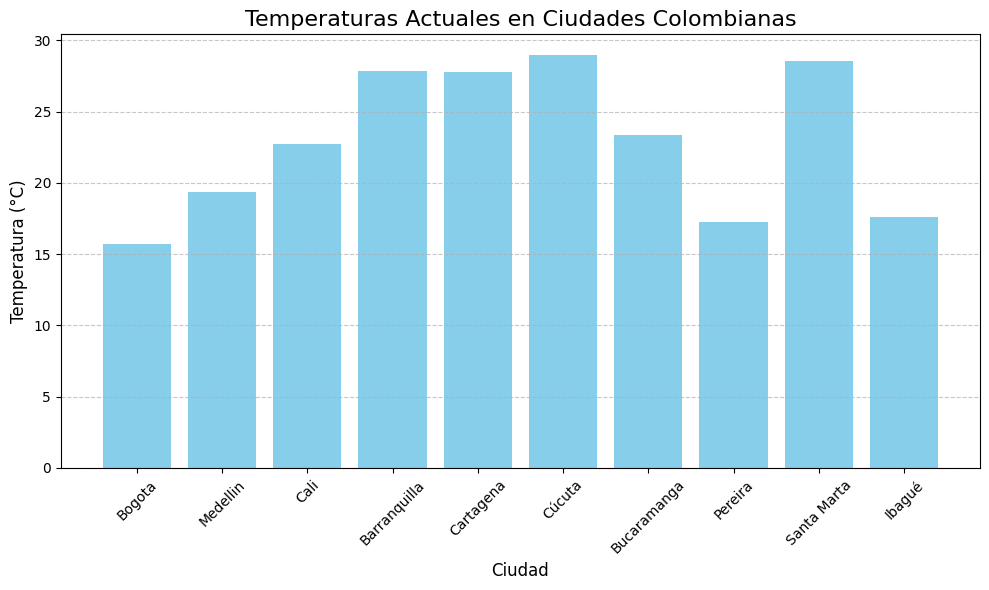

In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Reemplazar con tu API Key de OpenWeather
API_KEY = '1f0d0bd2caa37a79b47f021a3a09e1d2'

# Lista de ciudades colombianas
ciudades = ['Bogota', 'Medellin', 'Cali', 'Barranquilla', 'Cartagena', 'Cúcuta', 'Bucaramanga', 'Pereira', 'Santa Marta', 'Ibagué']

# Lista para almacenar los datos de temperatura
datos_temperatura = []

for ciudad in ciudades:
    url = f'http://api.openweathermap.org/data/2.5/weather?q={ciudad},CO&appid={API_KEY}&units=metric'
    respuesta = requests.get(url)

    if respuesta.status_code == 200:
        datos = respuesta.json()
        if 'main' in datos:
            temperatura_actual = datos['main']['temp']
            datos_temperatura.append({'Ciudad': ciudad, 'Temperatura': temperatura_actual})
        else:
            print(f'Error: No se encontraron los datos de temperatura para {ciudad}.')
    else:
        print(f'Error: No se pudo obtener los datos del clima para {ciudad}. Código de estado: {respuesta.status_code}')

# Crear un DataFrame de Pandas con los datos de temperatura
df_temperatura = pd.DataFrame(datos_temperatura)

# Crear una gráfica de barras con matplotlib
plt.figure(figsize=(10, 6))
plt.bar(df_temperatura['Ciudad'], df_temperatura['Temperatura'], color='skyblue')
plt.title('Temperaturas Actuales en Ciudades Colombianas', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar la gráfica
plt.show()
